In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#A Schoool Database is taken and the factors on which their final score depends is analysed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv("student-mat.csv",sep=";")

In [6]:
print(df.describe()) # understanding the data

              age        Medu        Fedu  ...          G1          G2          G3
count  395.000000  395.000000  395.000000  ...  395.000000  395.000000  395.000000
mean    16.696203    2.749367    2.521519  ...   10.908861   10.713924   10.415190
std      1.276043    1.094735    1.088201  ...    3.319195    3.761505    4.581443
min     15.000000    0.000000    0.000000  ...    3.000000    0.000000    0.000000
25%     16.000000    2.000000    2.000000  ...    8.000000    9.000000    8.000000
50%     17.000000    3.000000    2.000000  ...   11.000000   11.000000   11.000000
75%     18.000000    4.000000    3.000000  ...   13.000000   13.000000   14.000000
max     22.000000    4.000000    4.000000  ...   19.000000   19.000000   20.000000

[8 rows x 16 columns]


In [ ]:
df[df.isnull()].count() #checking if any null data is present

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

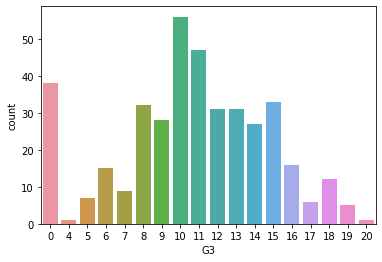

In [ ]:
#Distribution of marks 
sns.countplot(df['G3'])
#There are a lot of 0 than expected

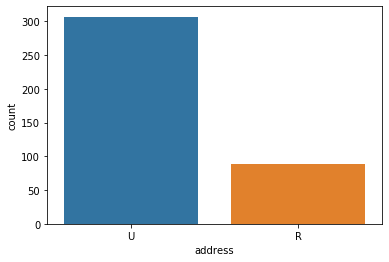

In [ ]:
sns.countplot('address',data=df)#More students are from urban background

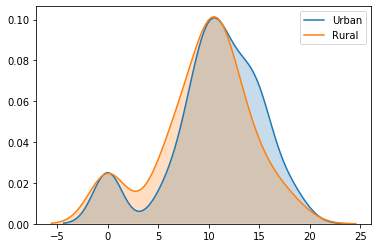

In [ ]:
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
#There are more top scorers from urban compared to rural. But cannot be considered due to biased dataset (contains less people from rural)

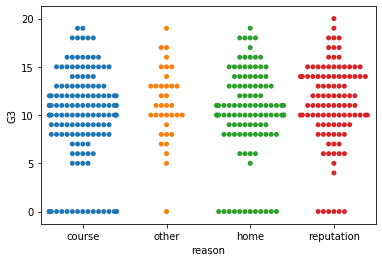

In [ ]:
sns.swarmplot(x='reason',y='G3',data=df)

In [ ]:
#Replacing categorical variables and finding correlation
modified_df = pd.get_dummies(df)
modified_df.corr()['G3'].abs().sort_values()[-12:-1]
# The final values depends primarily on G2,G1, highers_opted,relationship,failures,traveltime(lookbelow),mother and father education,go_out

romantic_yes    0.129970
romantic_no     0.129970
goout           0.132791
Fedu            0.152457
age             0.161579
higher_no       0.182465
higher_yes      0.182465
Medu            0.217147
failures        0.360415
G1              0.801468
G2              0.904868
Name: G3, dtype: float64

In [ ]:
df.corr()['G3'].abs().sort_values(ascending=False)[:12]


G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Name: G3, dtype: float64

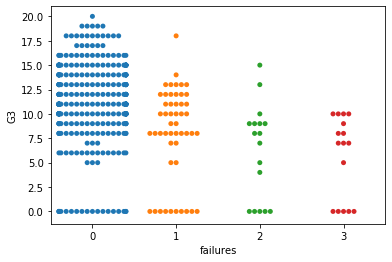

In [ ]:
sns.swarmplot(x='failures',y='G3',data=df) # Clearly it is dependent on the number of past failures

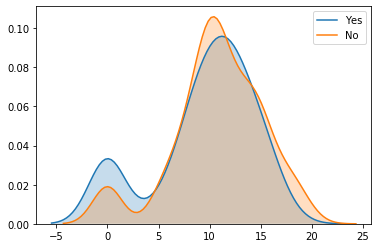

In [ ]:
sns.kdeplot(df.loc[df['romantic'] == 'yes', 'G3'], label='Yes', shade = True)
sns.kdeplot(df.loc[df['romantic'] == 'no', 'G3'], label='No', shade = True)
#People in a relationship tend to score more marks than people not in relationship

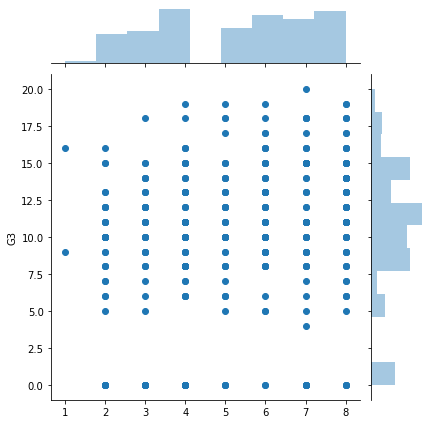

In [ ]:
sns.jointplot(x= df['Medu']+df['Fedu'] ,y=df['G3'],data=modified_df)#there is no significance between mother and father's education

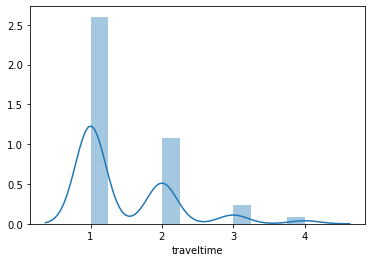

In [ ]:
sns.distplot(df['traveltime'])#more than 50 percent of the students live near their schools

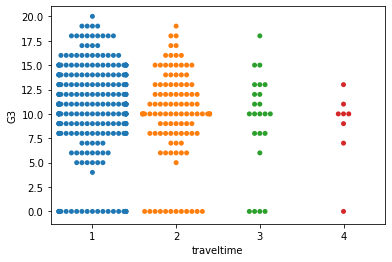

In [ ]:
sns.swarmplot(x='traveltime',y='G3',data=df) #No significant impact

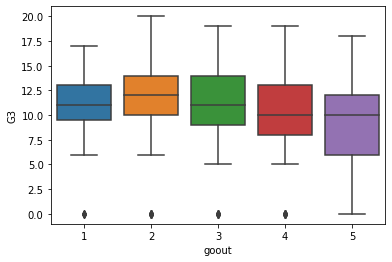

In [ ]:
sns.boxplot(x='goout',y='G3',data=df)# students with less going out time score more

In [7]:
#prediction if a student will pass or fail using SVM
#if marks<10 fail;if marks>=10 pass
def marks(a):
    if a>=10:
        return 1
    else:
        return 0
modified_df['G3'] = modified_df['G3'].apply(marks)

NameError: ignored

In [8]:
modified_df['G3'].value_counts() # The data is more biased towards passing students

NameError: ignored

In [9]:
df[(df['G3']==0)]#all of their absence is zero

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,home,father,1,2,3,no,yes,no,no,yes,yes,yes,no,3,3,2,1,1,3,0,6,7,0


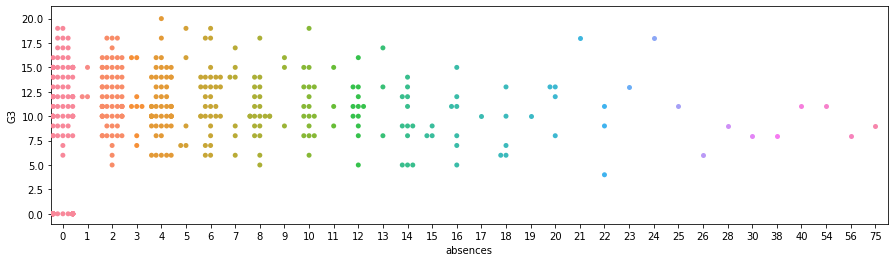

In [ ]:
#initially we saw a lot of zeroes. They must be removed from the data
plt.figure(figsize=(15,4))
c = sns.swarmplot(x='absences',y='G3',data=df)
plt.show()

In [10]:
df.drop(df[df['G3']==0].index,inplace=True)

In [11]:
df[df['G3']==0]['G3'].count()#cheking if properly removed

0

In [12]:
#also replacing modified df
modified_df = pd.get_dummies(df)
modified_df['G3'] = modified_df['G3'].apply(marks)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import svm

In [14]:
X = modified_df[['G2','G1','goout','romantic_yes','romantic_no','higher_yes','higher_no']]
y = modified_df['G3']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [16]:
classifier  = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)
predict = classifier.predict(X_test)
confusion_matrix(y_test,predict)

array([[20,  3],
       [ 7, 78]])

In [17]:
print(classification_report(y_test,predict))#i have no idea why it is not aligned properly

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.96      0.92      0.94        85

    accuracy                           0.91       108
   macro avg       0.85      0.89      0.87       108
weighted avg       0.92      0.91      0.91       108



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_c  = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
random_c.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = random_c.predict(X_test)

In [ ]:
print(classification_report(y_test,predict))#This shows higher accuracy than SVM. Trying Grid Search

precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.93      0.96      0.95        85

    accuracy                           0.92       108
   macro avg       0.89      0.85      0.87       108
weighted avg       0.91      0.92      0.91       108



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid  = GridSearchCV(random_c,param_grid={'n_estimators':[10,100,300,1000]})

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,


In [ ]:
random_c  = RandomForestClassifier(n_estimators=100,criterion='entropy')
random_c.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = random_c.predict(X_test)

In [ ]:
print(classification_report(y_test,predict))

precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.93      0.96      0.95        85

    accuracy                           0.92       108
   macro avg       0.89      0.85      0.87       108
weighted avg       0.91      0.92      0.91       108



In [19]:
from sklearn.linear_model import LogisticRegression,Perceptron
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.95      0.93      0.94        85

    accuracy                           0.91       108
   macro avg       0.86      0.88      0.87       108
weighted avg       0.91      0.91      0.91       108



In [20]:
lr = Perceptron()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.30      0.47        23
           1       0.84      1.00      0.91        85

    accuracy                           0.85       108
   macro avg       0.92      0.65      0.69       108
weighted avg       0.88      0.85      0.82       108

